<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-with-Ramanujan-Filter-Banks" data-toc-modified-id="Example-with-Ramanujan-Filter-Banks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example with Ramanujan Filter Banks</a></span><ul class="toc-item"><li><span><a href="#Signal-with-period-10-and-SNR=0" data-toc-modified-id="Signal-with-period-10-and-SNR=0-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Signal with period 10 and SNR=0</a></span></li><li><span><a href="#Period-Estimation" data-toc-modified-id="Period-Estimation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Period Estimation</a></span></li><li><span><a href="#Ramanujan-filter" data-toc-modified-id="Ramanujan-filter-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ramanujan filter</a></span><ul class="toc-item"><li><span><a href="#First-10-filters" data-toc-modified-id="First-10-filters-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>First 10 filters</a></span></li><li><span><a href="#30-40-filters" data-toc-modified-id="30-40-filters-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>30-40 filters</a></span></li></ul></li></ul></li><li><span><a href="#Period-Estimation-from-specific-range-of-period" data-toc-modified-id="Period-Estimation-from-specific-range-of-period-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Period Estimation from specific range of period</a></span><ul class="toc-item"><li><span><a href="#Signal-with-period-30" data-toc-modified-id="Signal-with-period-30-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Signal with period 30</a></span></li><li><span><a href="#Period-estimation-with-range" data-toc-modified-id="Period-estimation-with-range-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Period estimation with range</a></span></li></ul></li><li><span><a href="#Multiple-periods" data-toc-modified-id="Multiple-periods-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multiple periods</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, scipy
from scipy import linalg as LA
import spkit as sp

# Example with Ramanujan Filter Banks

## Signal with period 10 and SNR=0

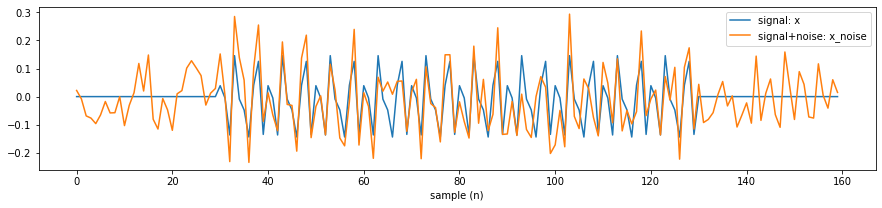

In [2]:
period = 10
SNR = 0

x0 = np.zeros(30)
x1 = np.random.randn(period)
x1 = np.tile(x1,10)
x  = np.r_[x0,x1,x0]
x /= LA.norm(x,2)

noise  = np.random.randn(len(x))
noise /= LA.norm(noise,2)

noise_power = 10**(-1*SNR/20)

noise *= noise_power
x_noise = x + noise

plt.figure(figsize=(15,3))
plt.plot(x,label='signal: x')
plt.plot(x_noise, label='signal+noise: x_noise')
plt.xlabel('sample (n)')
plt.legend()
plt.show()

## Period Estimation

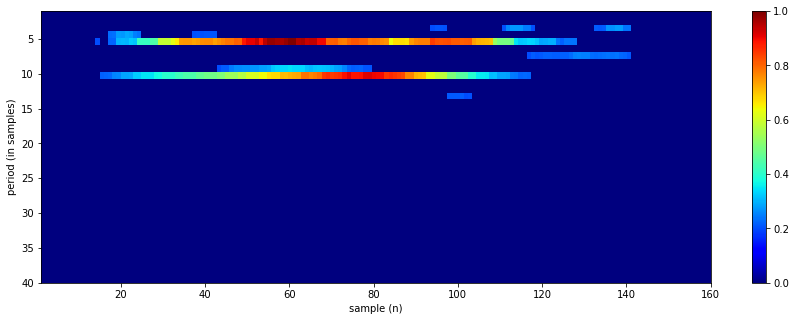

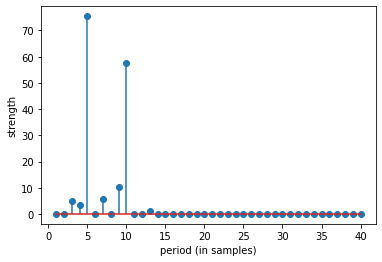

top 10 periods:  [ 5 10  9  7  3  4 13 18 17 16]


In [6]:
Pmax = 40  # Maximum period expected
Rcq  = 10  # Number of repeats in each Ramanujan filter
Rav  = 2   # Number of repeats in each averaging filter
Th   = 0.2 # Threshold zero out the output
 
y,FR, FA = sp.RFB(x_noise,Pmax=Pmax, Rcq=Rcq, Rav=Rav, Th=Th,return_filters=True)

plt.figure(figsize=(15,5))
im = plt.imshow(y.T,aspect='auto',cmap='jet',extent=[1,len(x_noise),Pmax,1])
plt.colorbar(im)
plt.xlabel('sample (n)')
plt.ylabel('period (in samples)')
plt.show()

plt.stem(np.arange(1,y.shape[1]+1),np.sum(y,0))
plt.xlabel('period (in samples)')
plt.ylabel('strength')
plt.show()

print('top 10 periods: ',np.argsort(np.sum(y,0))[::-1][:10]+1)

## Ramanujan filter

### First 10 filters

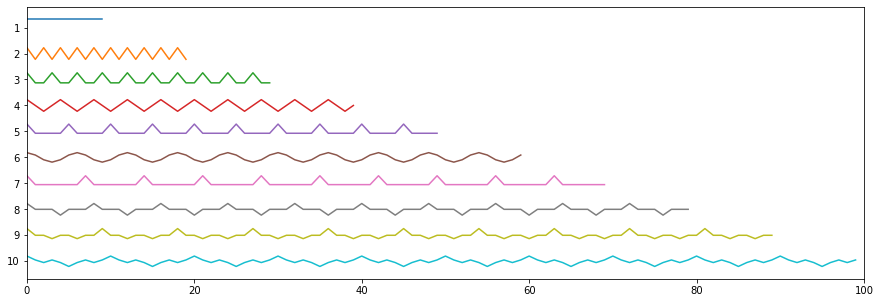

In [23]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.plot(FR[i] - i*1)
    
plt.xlim([0,len(FR[i])])
plt.yticks(-np.arange(10), np.arange(1,10+1))
plt.show()

###  30-40 filters

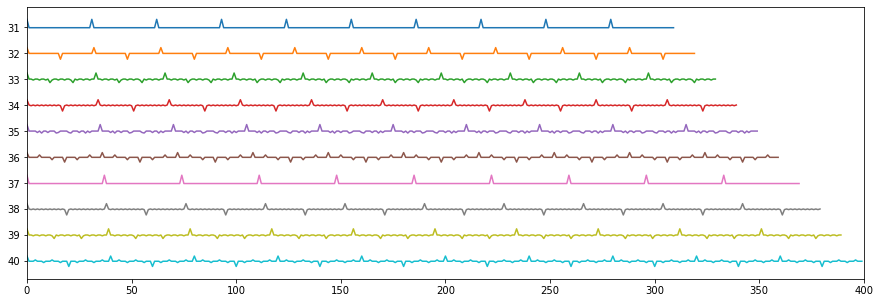

In [29]:
plt.figure(figsize=(15,5))
for i in range(30,40):
    plt.plot(FR[i] - (i-30)*1)
    
plt.xlim([0,len(FR[i])])
plt.yticks(-np.arange(10), np.arange(1,10+1)+30)
plt.show()

# Period Estimation from specific range of period

## Signal with period 30

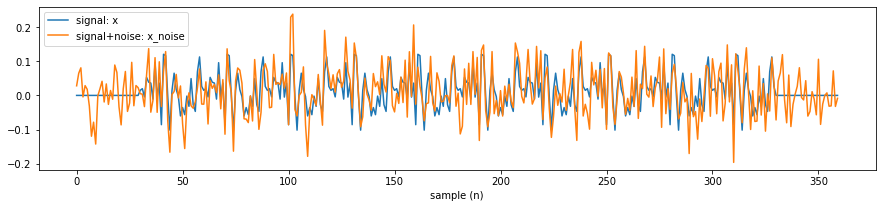

In [30]:
period = 30
SNR = 0

x0 = np.zeros(30)
x1 = np.random.randn(period)
x1 = np.tile(x1,10)
x  = np.r_[x0,x1,x0]
x /= LA.norm(x,2)

noise  = np.random.randn(len(x))
noise /= LA.norm(noise,2)

noise_power = 10**(-1*SNR/20)

noise *= noise_power
x_noise = x + noise

plt.figure(figsize=(15,3))
plt.plot(x,label='signal: x')
plt.plot(x_noise, label='signal+noise: x_noise')
plt.xlabel('sample (n)')
plt.legend()
plt.show()

## Period estimation with range

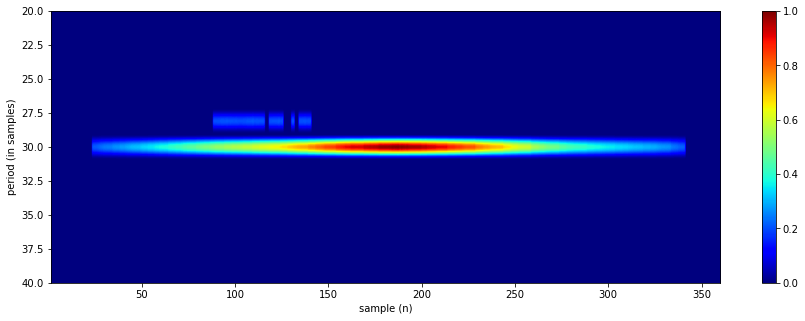

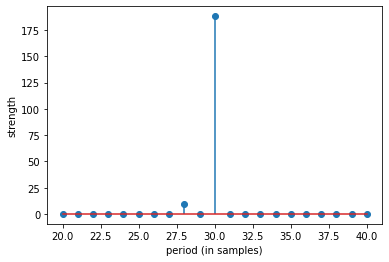

top 10 periods:  [30 28 29 21 22 23 24 25 26 27]


In [37]:
y,Plist = sp.RFB_prange(x=x_noise,Pmin=20,Pmax=40, Rcq=10, Rav=2, thr=0.2,return_filters=False)

plt.figure(figsize=(15,5))
im = plt.imshow(y.T,aspect='auto',cmap='jet',extent=[1,len(x_noise),40,20])
plt.colorbar(im)
plt.xlabel('sample (n)')
plt.ylabel('period (in samples)')
plt.show()

Penrgy = np.sum(y,0)

plt.stem(Plist,Penrgy)
plt.xlabel('period (in samples)')
plt.ylabel('strength')
plt.show()

print('top 10 periods: ',Plist[np.argsort(Penrgy)[::-1]][:10])

# Multiple periods

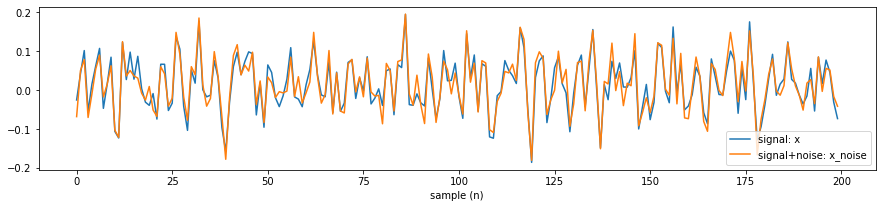

In [43]:
periods    = [10,14,18]
signal_length = 200
SNR = 10

x = np.zeros(signal_length)

for period in periods:
    x_temp  = np.random.randn(period)
    x_temp  = np.tile(x_temp,int(np.ceil(signal_length/period))) 
    x_temp  = x_temp[:signal_length]
    x_temp /= LA.norm(x_temp,2)
    x += x_temp
    
x /= LA.norm(x,2)


noise  = np.random.randn(len(x))
noise /= LA.norm(noise,2)
noise_power = 10**(-1*SNR/20)
noise *= noise_power
x_noise = x + noise

plt.figure(figsize=(15,3))
plt.plot(x,label='signal: x')
plt.plot(x_noise, label='signal+noise: x_noise')
plt.xlabel('sample (n)')
plt.legend()
plt.show()

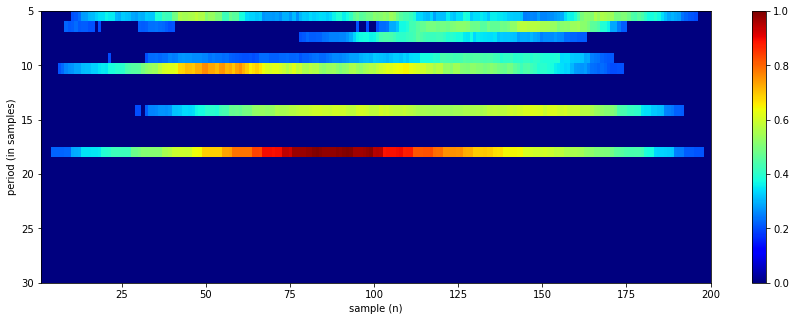

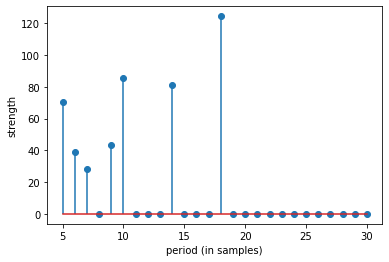

top 10 periods:  [18 10 14  5  9  6  7 16  8 11]


In [44]:
y,Plist = sp.RFB_prange(x=x_noise,Pmin=5,Pmax=30, Rcq=10, Rav=2, thr=0.2,return_filters=False)

plt.figure(figsize=(15,5))
im = plt.imshow(y.T,aspect='auto',cmap='jet',extent=[1,len(x_noise),30,5])
plt.colorbar(im)
plt.xlabel('sample (n)')
plt.ylabel('period (in samples)')
plt.show()

Penrgy = np.sum(y,0)

plt.stem(Plist,Penrgy)
plt.xlabel('period (in samples)')
plt.ylabel('strength')
plt.show()

print('top 10 periods: ',Plist[np.argsort(Penrgy)[::-1]][:10])